In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

tf.random.set_seed(777)  # for reproducibility

print(tf.__version__)

2.3.1


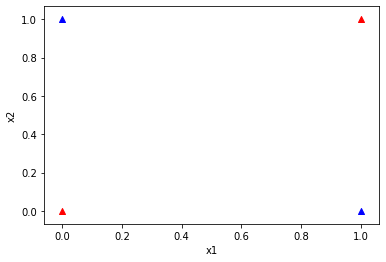

In [2]:
x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]
y_data = [[0],
          [1],
          [1],
          [0]]

plt.scatter(x_data[0][0], x_data[0][1], c='red', marker='^')
plt.scatter(x_data[3][0], x_data[3][1], c='red', marker='^')
plt.scatter(x_data[1][0], x_data[1][1], c='blue', marker='^')
plt.scatter(x_data[2][0], x_data[2][1], c='blue', marker='^')

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [18]:
dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data)).batch(len(x_data))
nb_classes = 10

class wide_deep_nn():
    def __init__(self, nb_classes):
        super(wide_deep_nn, self).__init__()        
     
        self.W1 = tf.Variable(tf.random.normal((2, nb_classes)), name='weight1')
        self.b1 = tf.Variable(tf.random.normal((nb_classes,)), name='bias1')

        self.W2 = tf.Variable(tf.random.normal((nb_classes, nb_classes)), name='weight2')
        self.b2 = tf.Variable(tf.random.normal((nb_classes,)), name='bias2')

        self.W3 = tf.Variable(tf.random.normal((nb_classes, nb_classes)), name='weight3')
        self.b3 = tf.Variable(tf.random.normal((nb_classes,)), name='bias3')

        self.W4 = tf.Variable(tf.random.normal((nb_classes, 1)), name='weight4')
        self.b4 = tf.Variable(tf.random.normal((1,)), name='bias4')
        
        self.variables = [self.W1, self.b1, self.W2, self.b2, self.W3, self.b3, self.W4, self.b4]
        
    def preprocess_data(self, features, labels):
        features = tf.cast(features, tf.float32)
        labels = tf.cast(labels, tf.float32)
        return features, labels
        
    def deep_nn(self, features):
        layer1 = tf.sigmoid(tf.matmul(features, self.W1) + self.b1)
        layer2 = tf.sigmoid(tf.matmul(layer1, self.W2) + self.b2)
        layer3 = tf.sigmoid(tf.matmul(layer2, self.W3) + self.b3)
        hypothesis = tf.sigmoid(tf.matmul(layer3, self.W4) + self.b4)
        return hypothesis
    
    def loss_fn(self, hypothesis, features, labels):
        cost = -tf.reduce_mean(labels * tf.math.log(hypothesis) + (1 - labels) * tf.math.log(1 - hypothesis))
        return cost

    def accuracy_fn(self, hypothesis, labels):
        predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
        accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.float32))
        return accuracy

    def grad(self, hypothesis, features, labels):
        with tf.GradientTape() as tape:
            loss_value = self.loss_fn(self.deep_nn(features), features, labels)
        return tape.gradient(loss_value, self.variables)
    
    def fit(self, dataset, EPOCHS=20000, verbose=500):
        optimizer =  tf.keras.optimizers.SGD(learning_rate=0.01)
        for step in range(EPOCHS):
            for features, labels  in dataset:
                features, labels = self.preprocess_data(features, labels)
                grads = self.grad(self.deep_nn(features), features, labels)
                optimizer.apply_gradients(grads_and_vars=zip(grads, self.variables))
                if step % verbose == 0:
                    print("Iter: {}, Loss: {:.4f}".format(step, self.loss_fn(self.deep_nn(features), features, labels)))

    def test_model(self, x_data, y_data):
        x_data, y_data = self.preprocess_data(x_data, y_data)
        test_acc = self.accuracy_fn(self.deep_nn(x_data), y_data)
        print("Testset Accuracy: {:.4f}".format(test_acc))

In [19]:
model = wide_deep_nn(nb_classes)

In [20]:
model.fit(dataset)

Iter: 0, Loss: 0.8900
Iter: 500, Loss: 0.6909
Iter: 1000, Loss: 0.6896
Iter: 1500, Loss: 0.6883
Iter: 2000, Loss: 0.6870
Iter: 2500, Loss: 0.6856
Iter: 3000, Loss: 0.6842
Iter: 3500, Loss: 0.6827
Iter: 4000, Loss: 0.6811
Iter: 4500, Loss: 0.6793
Iter: 5000, Loss: 0.6774
Iter: 5500, Loss: 0.6752
Iter: 6000, Loss: 0.6728
Iter: 6500, Loss: 0.6702
Iter: 7000, Loss: 0.6672
Iter: 7500, Loss: 0.6637
Iter: 8000, Loss: 0.6599
Iter: 8500, Loss: 0.6554
Iter: 9000, Loss: 0.6504
Iter: 9500, Loss: 0.6447
Iter: 10000, Loss: 0.6381
Iter: 10500, Loss: 0.6307
Iter: 11000, Loss: 0.6223
Iter: 11500, Loss: 0.6129
Iter: 12000, Loss: 0.6025
Iter: 12500, Loss: 0.5909
Iter: 13000, Loss: 0.5782
Iter: 13500, Loss: 0.5645
Iter: 14000, Loss: 0.5497
Iter: 14500, Loss: 0.5338
Iter: 15000, Loss: 0.5168
Iter: 15500, Loss: 0.4985
Iter: 16000, Loss: 0.4783
Iter: 16500, Loss: 0.4552
Iter: 17000, Loss: 0.4275
Iter: 17500, Loss: 0.3928
Iter: 18000, Loss: 0.3492
Iter: 18500, Loss: 0.2975
Iter: 19000, Loss: 0.2436
Iter: 1950

In [21]:
model.test_model(x_data, y_data)

Testset Accuracy: 1.0000
